# BoomBikes Bike sharing case study

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


#### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

#### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


#### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
```
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
```
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.
 

## Data Dictionary

_______
### Dataset Characterstics
_______

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
____________
### License
_____________

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

________________
### Contact
______________
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.max_columns", None)

## Load Data

#### Understand the columns and shape of the dataset

In [2]:
bikes_df = pd.read_csv("day.csv")
print("Dataframe shape", bikes_df.shape)

print("\n", bikes_df.info())

bikes_df.head()

Dataframe shape (730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB

 None


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.111,18.181,80.583,10.750,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.903,17.687,69.609,16.652,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.051,9.470,43.727,16.637,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200,10.606,59.044,10.740,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305,11.463,43.696,12.522,82,1518,1600


#### Get the unique values details of the dataset

In [3]:
bikes_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Observations
Columns that will not help in the prediction<br>
- instant
- dteday (because it is already broken down into yr, mnth and weekday)
- casual (casual + register already exist in cnt)
- register (casual + register already exist in cnt)

Categorical columns
- season
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

Continuous columns
- instant
- dteday
- temp
- atemp
- hum
- windspeed
- casual
- registered
- cnt

## Data Validation

#### Check null values - columns

In [4]:
print("Null value %\n")

for col in bikes_df.columns:
    print(col, "\t", 100 * bikes_df[col].isnull().sum() / len(bikes_df))

Null value %

instant 	 0.0
dteday 	 0.0
season 	 0.0
yr 	 0.0
mnth 	 0.0
holiday 	 0.0
weekday 	 0.0
workingday 	 0.0
weathersit 	 0.0
temp 	 0.0
atemp 	 0.0
hum 	 0.0
windspeed 	 0.0
casual 	 0.0
registered 	 0.0
cnt 	 0.0


#### Describe the columns

In [5]:
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000,730.000
mean,365.500,2.499,0.500,6.526,0.029,2.997,0.684,1.395,20.319,23.726,62.765,12.764,849.249,3658.758,4508.007
std,210.877,1.110,0.500,3.450,0.167,2.006,0.465,0.545,7.507,8.150,14.238,5.196,686.480,1559.759,1936.012
min,1.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,2.424,3.953,0.000,1.500,2.000,20.000,22.000
25%,183.250,2.000,0.000,4.000,0.000,1.000,0.000,1.000,13.812,16.890,52.000,9.042,316.250,2502.250,3169.750
50%,365.500,3.000,0.500,7.000,0.000,3.000,1.000,1.000,20.466,24.368,62.625,12.125,717.000,3664.500,4548.500
75%,547.750,3.000,1.000,10.000,0.000,5.000,1.000,2.000,26.881,30.446,72.990,15.626,1096.500,4783.250,5966.000
max,730.000,4.000,1.000,12.000,1.000,6.000,1.000,3.000,35.328,42.045,97.250,34.000,3410.000,6946.000,8714.000


### Remove the unwanted columns
- `instant` - It is just a sequence and will not help in the prediction
- `dteday` - The dates columns is already broken down, so this is just redundent
- `casual` - cnt column already has casual + registered data
- `registered` - cnt column already has casual + registered data

In [6]:
bike_new_df = bikes_df.drop(["instant", "dteday", "casual", "registered"], axis=1)
bike_new_df.shape

(730, 12)

## Data Visualisation

Divide the columns in continuous and categorical columns and target column
- Cat columns
    - season
    - yr
    - mnth
    - holiday
    - weekday
    - workingday
    - weathersit
- Con columns
    - temp
    - atemp
    - hum
    - windspeed
- Target columns
    - cnt

In [7]:
cat_col = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
con_col = ["temp", "atemp", "hum", "windspeed"]
target_col = "cnt"

#### Map the values to the columns
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [8]:
bike_new_df["season"] = bike_new_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike_new_df["yr"] = bike_new_df["yr"].map({0:"2018", 1:"2019"})
bike_new_df["weathersit"] = bike_new_df["weathersit"].map({1:"Clear", 2:"Mist", 3:"Light Snow", 4:"Snow + Fog"})

In [9]:
bike_new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Mist,14.111,18.181,80.583,10.750,985
1,spring,2018,1,0,0,0,Mist,14.903,17.687,69.609,16.652,801
2,spring,2018,1,0,1,1,Clear,8.051,9.470,43.727,16.637,1349
3,spring,2018,1,0,2,1,Clear,8.200,10.606,59.044,10.740,1562
4,spring,2018,1,0,3,1,Clear,9.305,11.463,43.696,12.522,1600


### Visualising the continuous columns

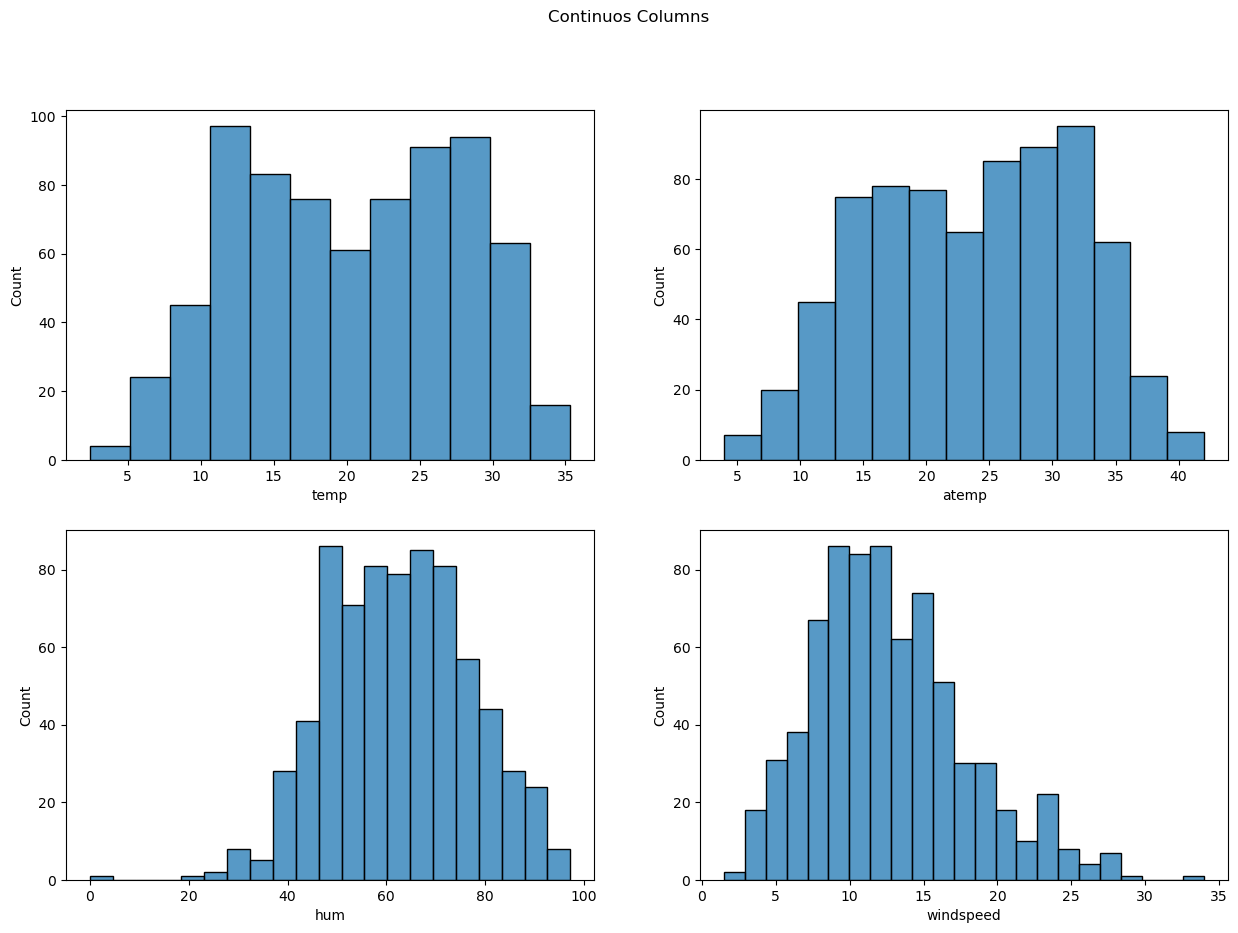

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Continuos Columns")

for index, col in enumerate(con_col):
    plotRow = int(index / 2)
    plotCol = index % 2
    
    sns.histplot(ax= axes[plotRow][plotCol], data=bike_new_df, x=col)


### Visualising the continuous columns in relation to target column

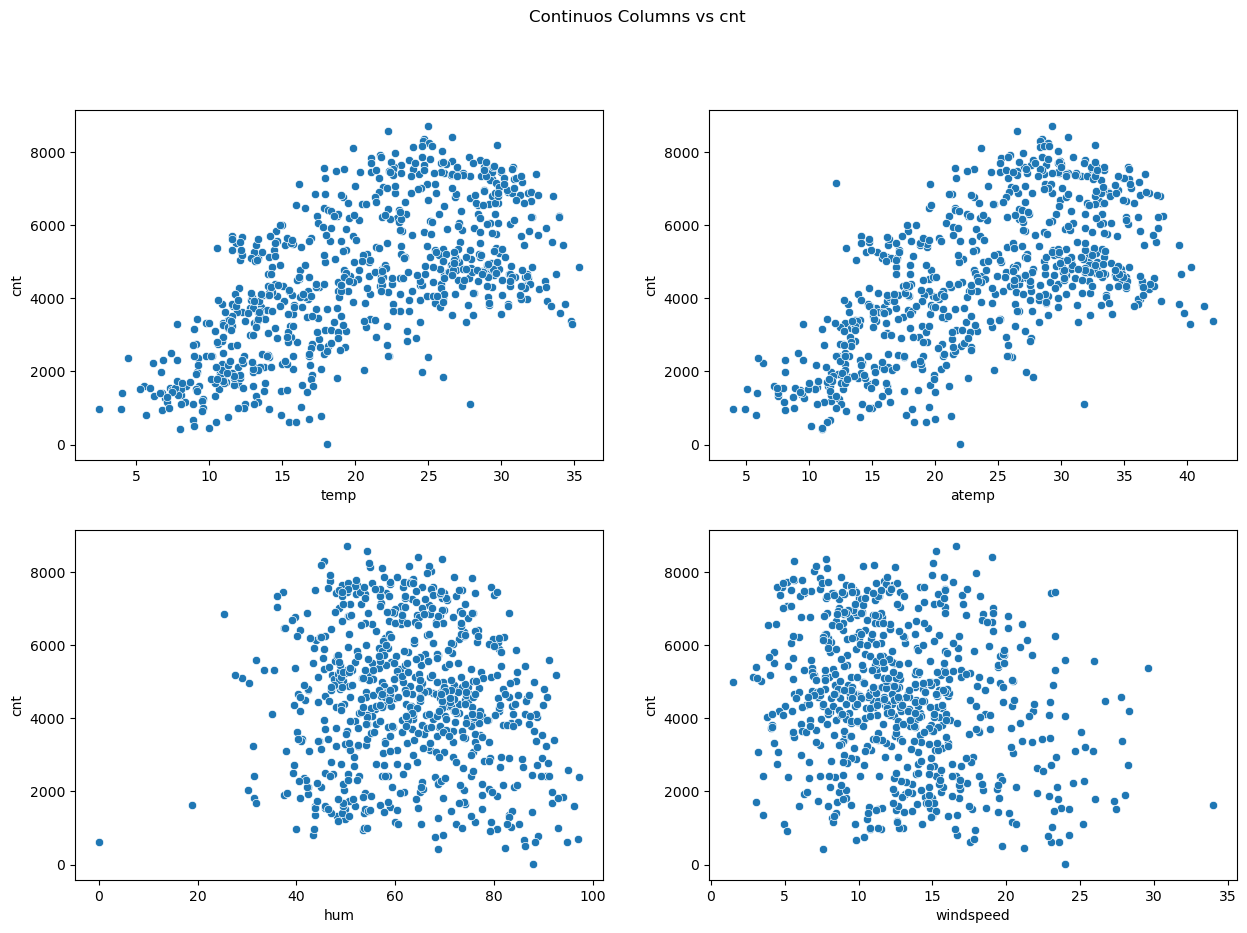

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Continuos Columns vs cnt")

for index, col in enumerate(con_col):
    plotRow = int(index / 2)
    plotCol = index % 2
    
    sns.scatterplot(ax= axes[plotRow][plotCol], data=bike_new_df, x=col, y=target_col)

### Visualising the continuous columns with pairplot relationship

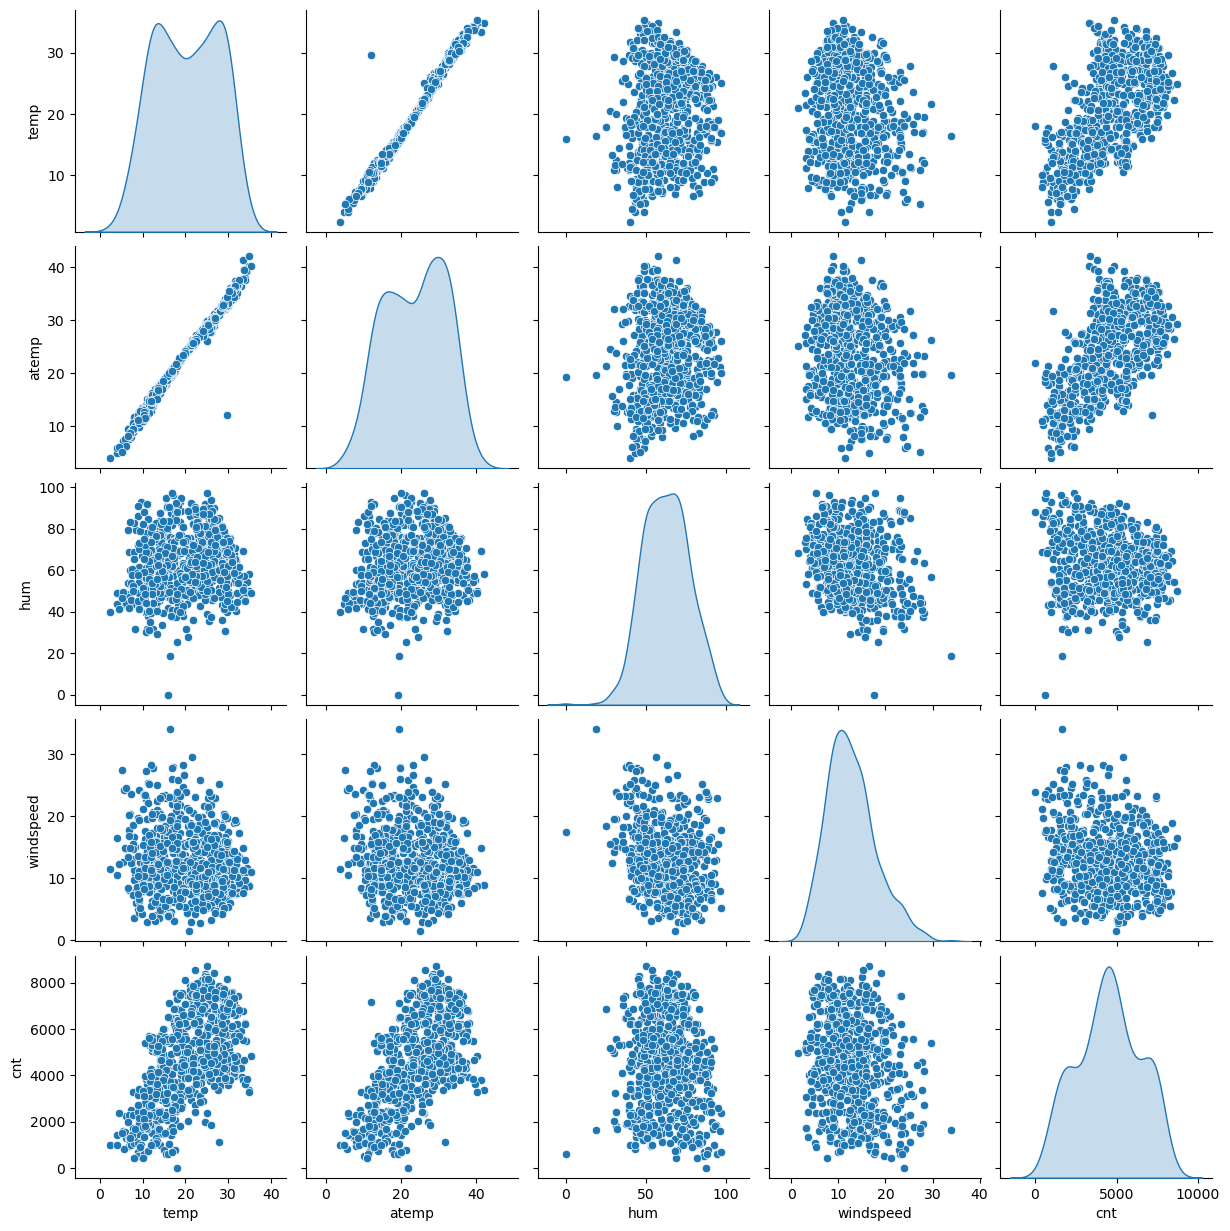

In [12]:
all_cont_col = con_col + [target_col]
sns.pairplot(bike_new_df[all_cont_col], diag_kind="kde")
plt.show()

### Correlation between continuous variables

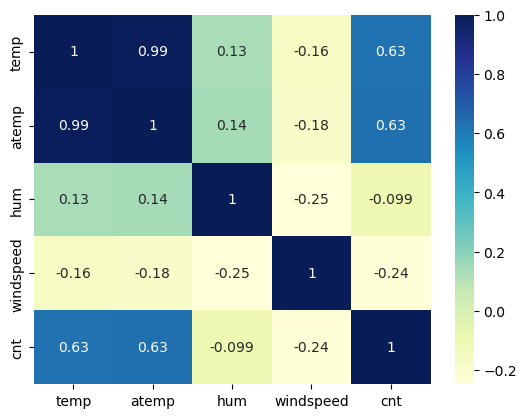

In [13]:
sns.heatmap(bike_new_df[all_cont_col].corr(), annot=True, cmap="YlGnBu")
plt.show()

### Visualising the categorical columns

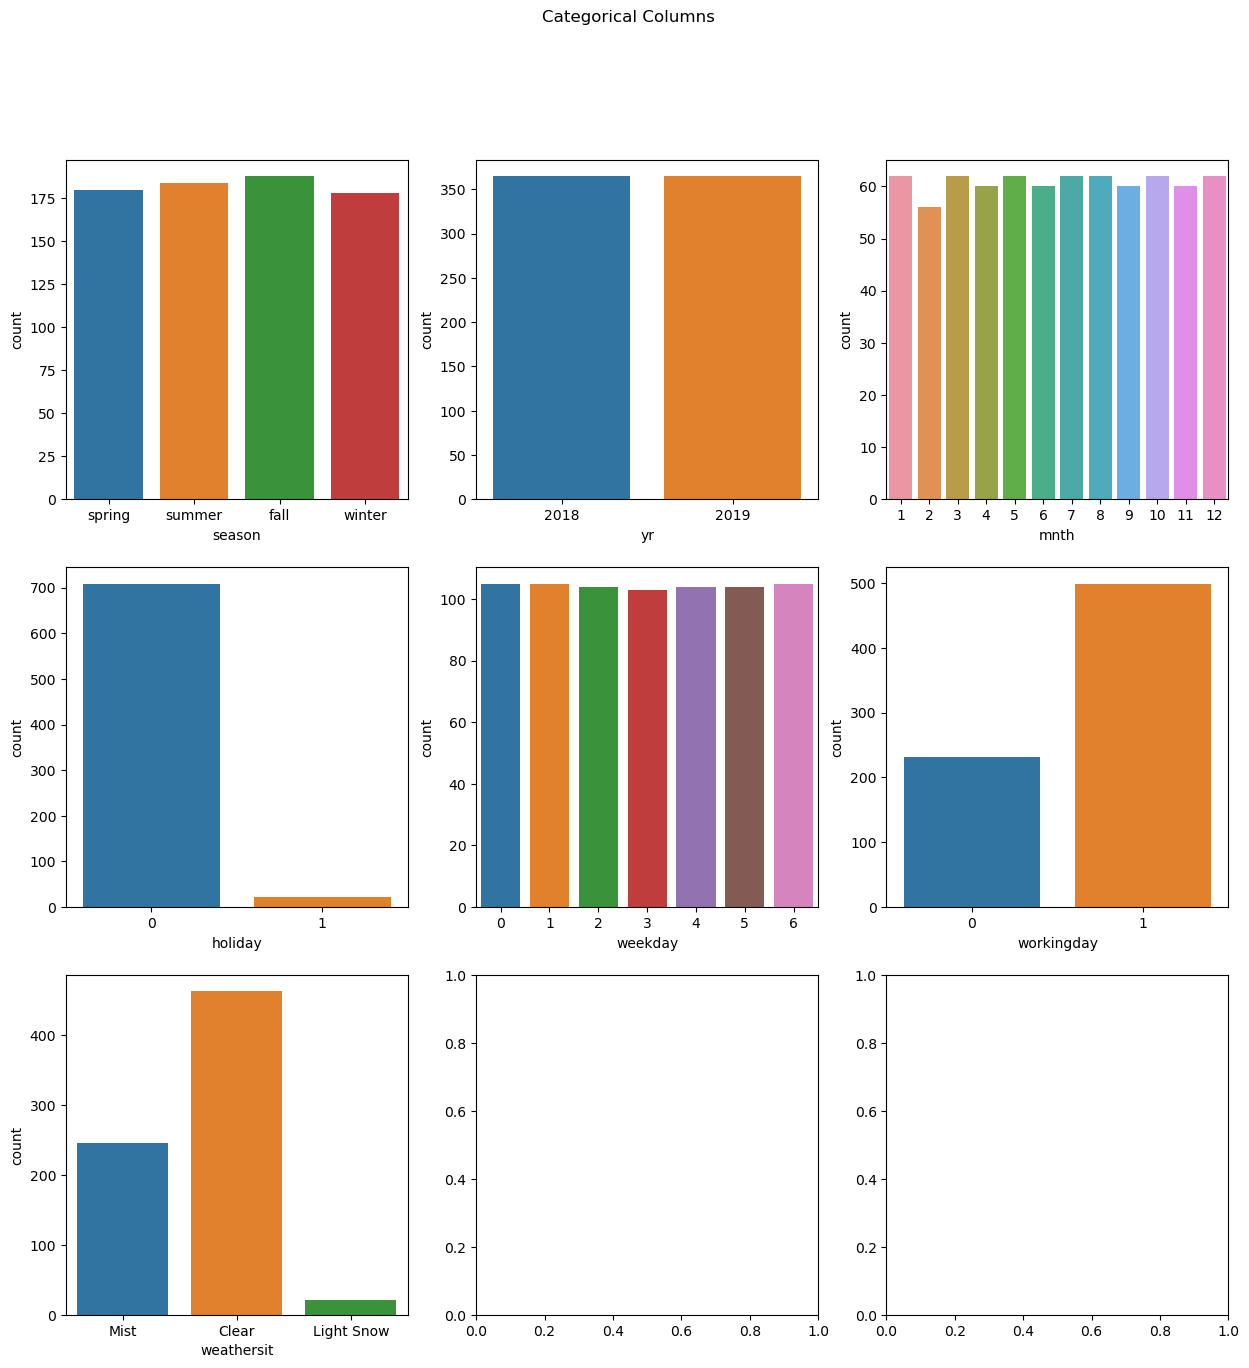

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Categorical Columns")

for index, col in enumerate(cat_col):
    plotRow = int(index / 3)
    plotCol = index % 3
    
    sns.countplot(ax= axes[plotRow][plotCol], data=bike_new_df, x=col)

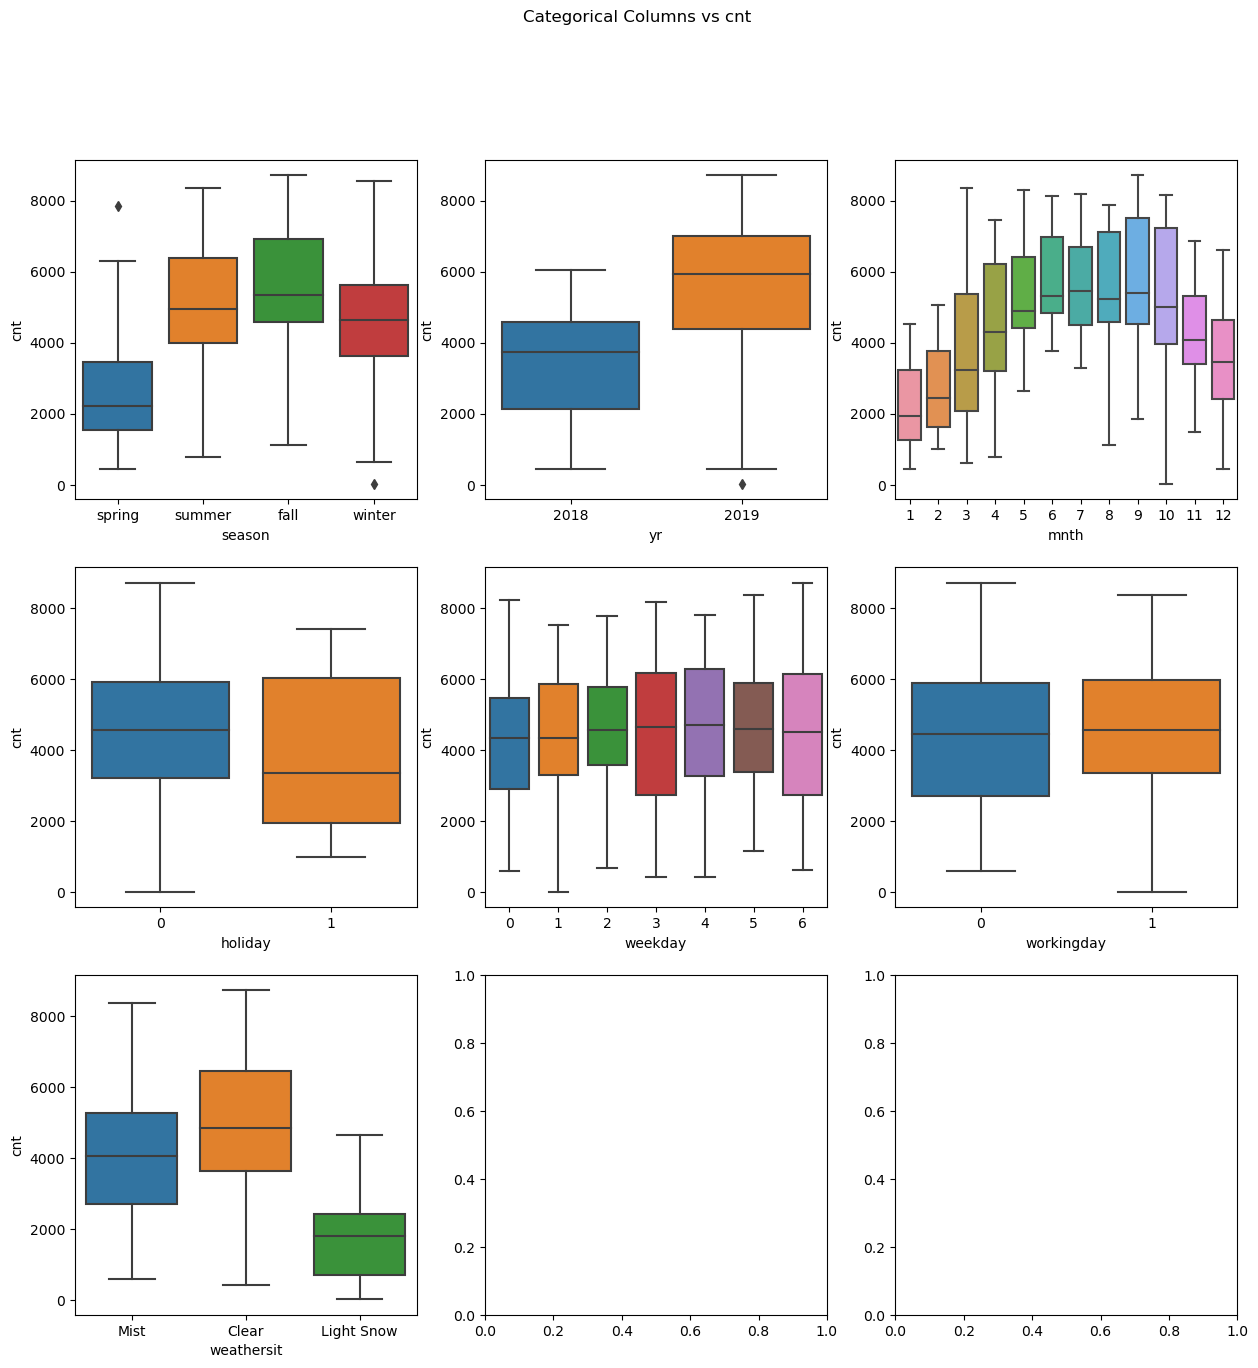

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Categorical Columns vs cnt")

for index, col in enumerate(cat_col):
    plotRow = int(index / 3)
    plotCol = index % 3
    
    sns.boxplot(ax=axes[plotRow][plotCol], data=bike_new_df, x=col, y=target_col)

## Observation

- Continuous column:
    - temp and atemp seems to have a +ve relationship with cnt
- Categorical columns:
    - `fall` has the highest cnt followed by `summer`, `winter` and `spring`
    - `2019` year growth is higher than the `2018` growth
    - non-holiday days contains most of the data (more than 90%).
    - non-working day has more data but there is not much difference in the mean
    - bike demand when the weather is `clear` is highest followed by `mist` and `light snow`
    - No bike demand found for `snow + fog`
    - Bike demand during `all weekdays` is almost same
    - Bike demand remains unchanged whether it is a working day or not
    - Bike demand is highest between the months of `May to Oct`

## Creating dummy variables from categorical columns

In [16]:
bike_new_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### Dummy variables
We will create dummy variable for columns -> "season", "mnth", "weekday", "weathersit"
Before converting to dummy variables, we will convert the columns to `category` data type

In [17]:
# columns to convert to dummy_variables
dummy_var_col = ["season", "mnth", "weekday", "weathersit"]

# convert the type to category to automate the dummy varaiables creation
for col in dummy_var_col:
    bike_new_df[col] = bike_new_df[col].astype("category")
    
print(bike_new_df.shape)
bike_new_df.info()

(730, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    object  
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3), object(1)
memory usage: 49.7+ KB


Below code does three things
- Create dummy variables
- Drop the first dummy variable from each set
- Drop the origical cateogry column

In [18]:

# Create dummy variables
# Drop the first dummy variable from each set
# Drop the origical cateogry column
bike_new_df = pd.get_dummies(bike_new_df, drop_first=True)

print("shape: ", bike_new_df.shape)

bike_new_df.info()

shape:  (730, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                730 non-null    int64  
 1   workingday             730 non-null    int64  
 2   temp                   730 non-null    float64
 3   atemp                  730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  yr_2019                730 non-null    uint8  
 11  mnth_2                 730 non-null    uint8  
 12  mnth_3                 730 non-null    uint8  
 13  mnth_4                 730 non-null    uint8  
 14  mnth_5                 730 non-null    u

_____________

## Splitting the data in Train and Test models

### Importing all the relevant Libraries

In [19]:
import sklearn
# Spliting the train and test
from sklearn.model_selection import train_test_split
# rescaling the set
from sklearn.preprocessing import MinMaxScaler

# automated column selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as st_api
# find the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

#### Splitting the data into train and test
- Splitting the data to train and test. 
- We are splitting it in 70-30 train-test ratio

In [21]:
bike_train_df, bike_test_df = train_test_split(bike_new_df, train_size=0.7, random_state=100)

Train data shape

In [22]:
bike_train_df.shape

(510, 30)

In [23]:
bike_test_df.shape

(220, 30)

#### Verifying the details of train and test after the split

In [24]:
bike_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                510 non-null    int64  
 1   workingday             510 non-null    int64  
 2   temp                   510 non-null    float64
 3   atemp                  510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    int64  
 7   season_spring          510 non-null    uint8  
 8   season_summer          510 non-null    uint8  
 9   season_winter          510 non-null    uint8  
 10  yr_2019                510 non-null    uint8  
 11  mnth_2                 510 non-null    uint8  
 12  mnth_3                 510 non-null    uint8  
 13  mnth_4                 510 non-null    uint8  
 14  mnth_5                 510 non-null    uint8  
 15  mnth

In [25]:
bike_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   holiday                220 non-null    int64  
 1   workingday             220 non-null    int64  
 2   temp                   220 non-null    float64
 3   atemp                  220 non-null    float64
 4   hum                    220 non-null    float64
 5   windspeed              220 non-null    float64
 6   cnt                    220 non-null    int64  
 7   season_spring          220 non-null    uint8  
 8   season_summer          220 non-null    uint8  
 9   season_winter          220 non-null    uint8  
 10  yr_2019                220 non-null    uint8  
 11  mnth_2                 220 non-null    uint8  
 12  mnth_3                 220 non-null    uint8  
 13  mnth_4                 220 non-null    uint8  
 14  mnth_5                 220 non-null    uint8  
 15  mnth

### Correlation matrix between columns

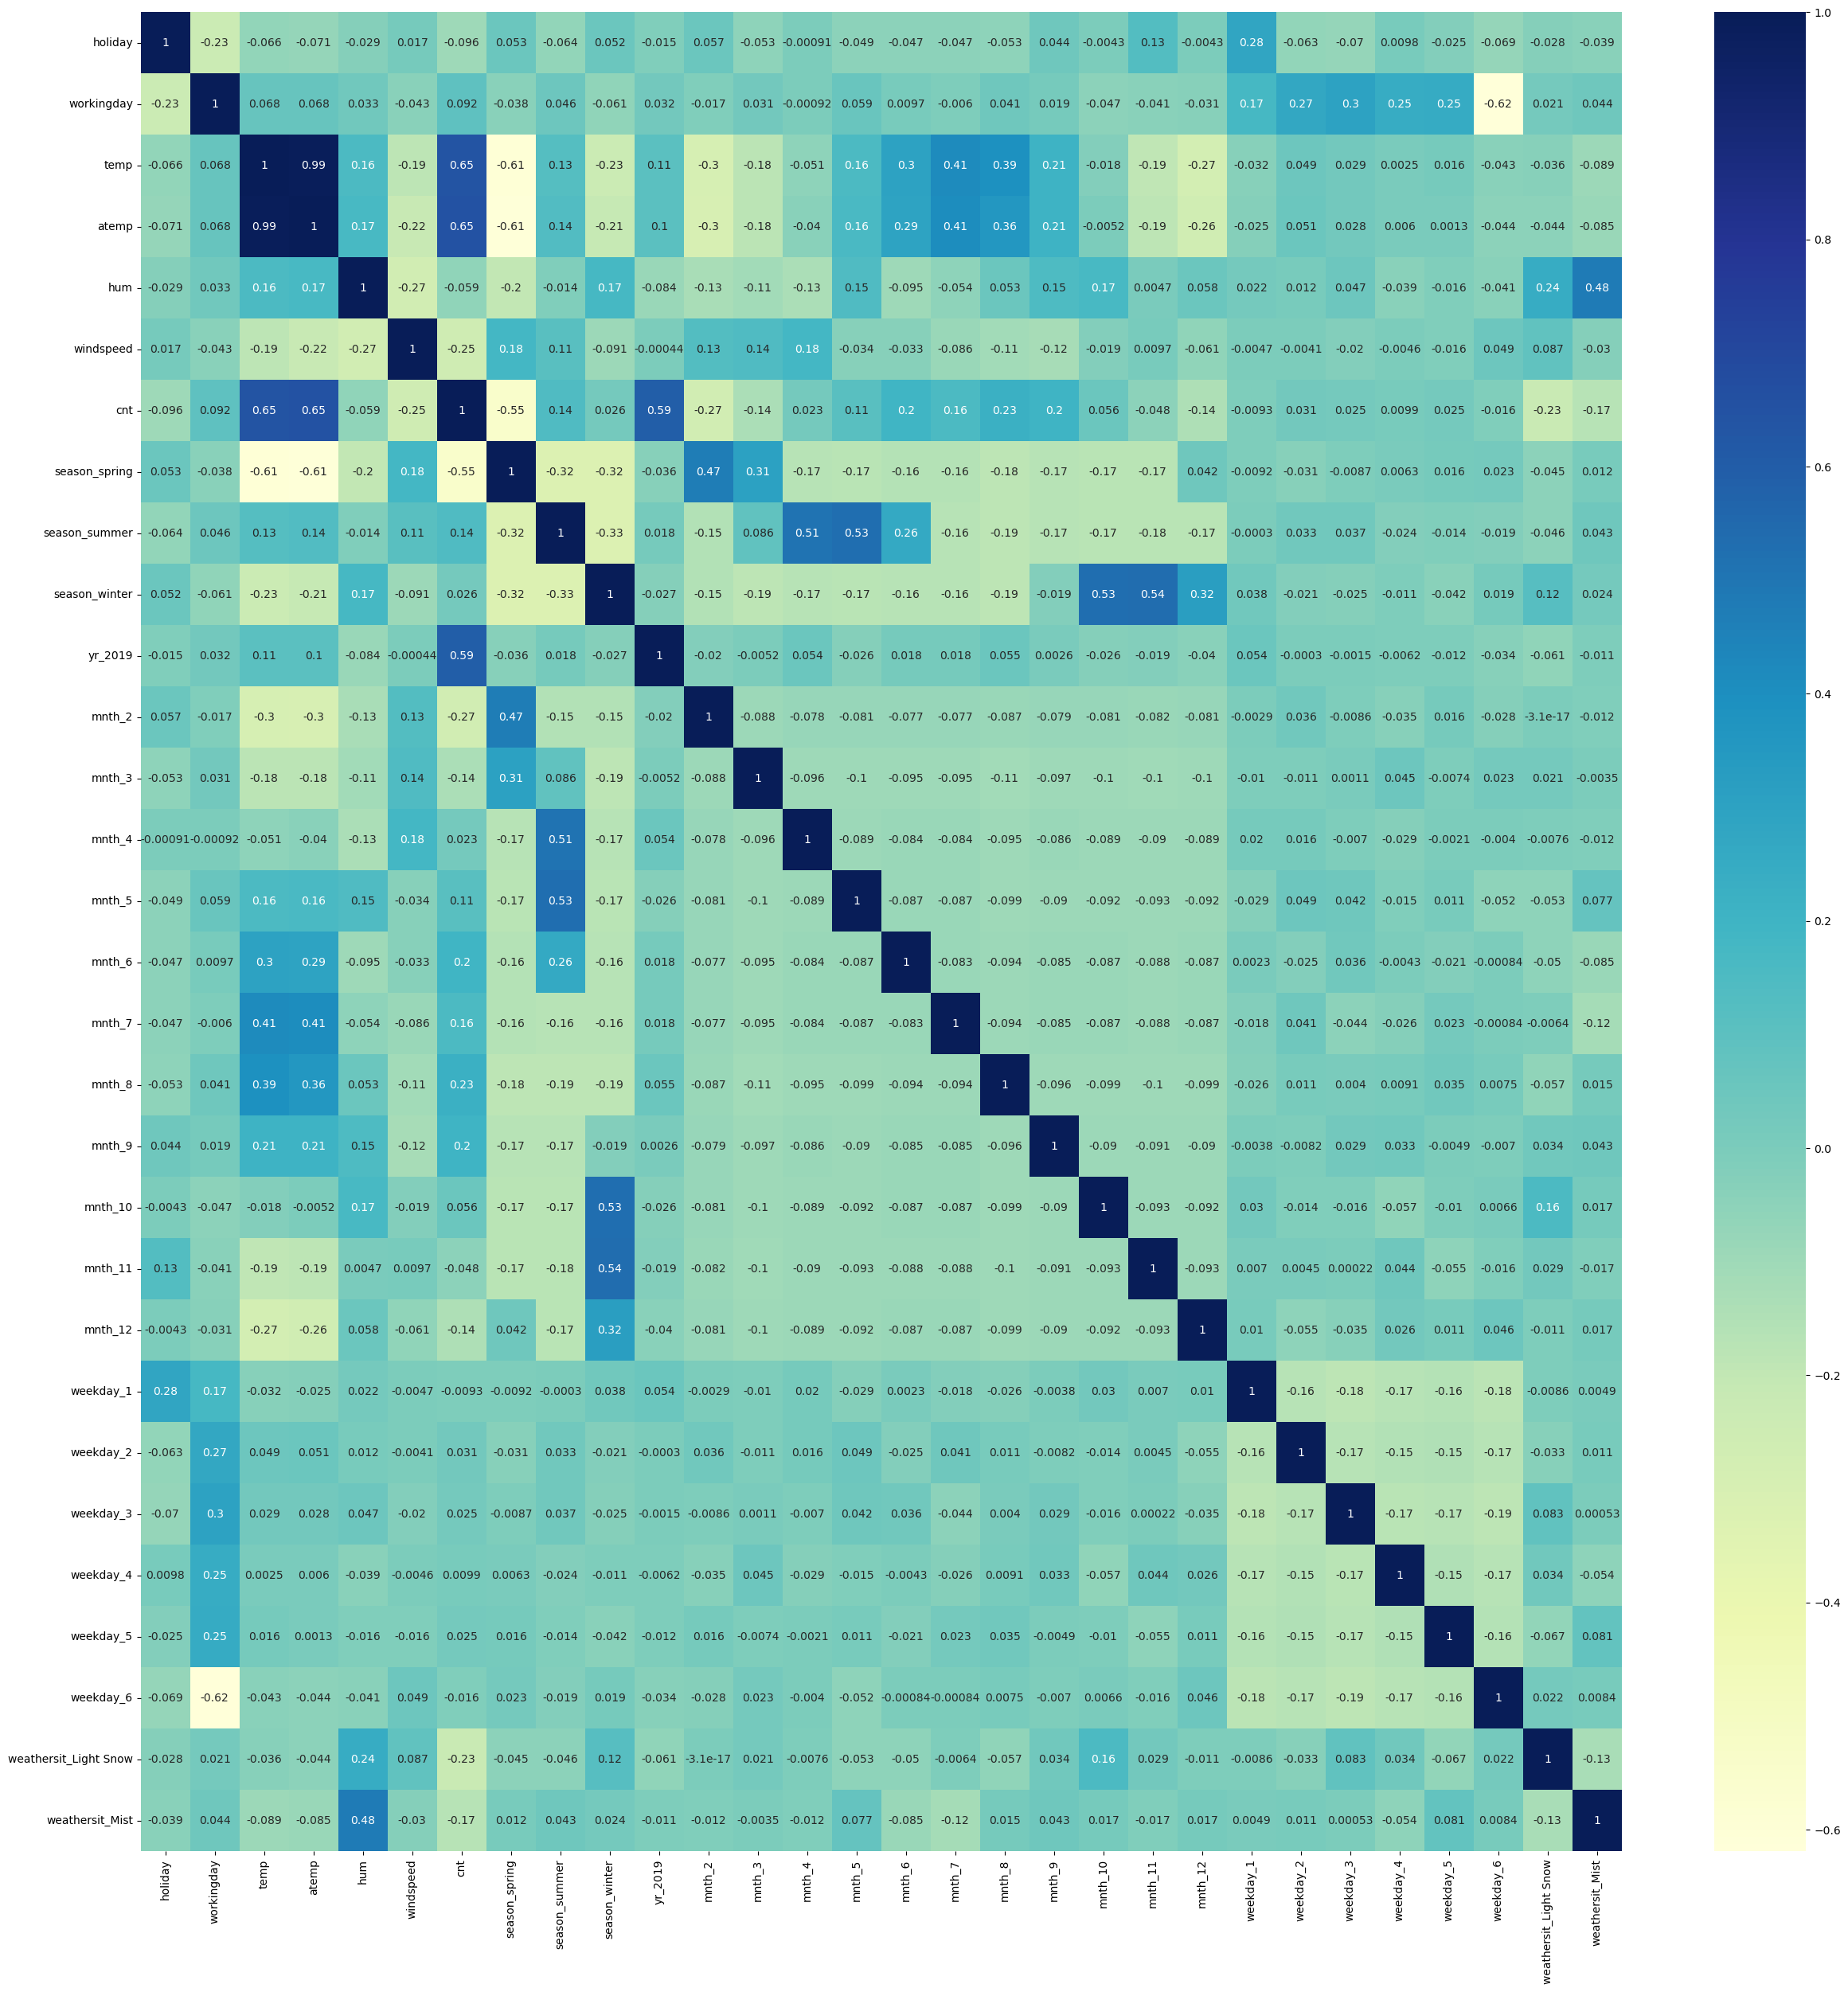

In [26]:
plt.figure(figsize = (30,30))
sns.heatmap(bike_train_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Observations from heatmap

- It shows what all variables has high colearity with the Target variable(cnt)
- It also shows that there are features with multicollenarity

_________

## Rescaling the features

Using the min max scalling. It brings the scalled variables between 0-1

In [27]:
# Create an instance of MinMax
minMaxScale = MinMaxScaler()

# select the continuous variables to transform
transform_vars = con_col + ["cnt"]

bike_train_df[transform_vars] = minMaxScale.fit_transform(bike_train_df[transform_vars])

In [29]:
bike_train_df.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
count,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000,510.000
mean,0.025,0.676,0.537,0.513,0.650,0.321,0.513,0.243,0.247,0.247,0.508,0.067,0.098,0.078,0.084,0.076,0.076,0.096,0.080,0.084,0.086,0.084,0.151,0.131,0.159,0.133,0.127,0.155,0.029,0.345
std,0.158,0.468,0.226,0.212,0.146,0.170,0.224,0.429,0.432,0.432,0.500,0.250,0.298,0.269,0.278,0.266,0.266,0.295,0.272,0.278,0.281,0.278,0.358,0.338,0.366,0.340,0.334,0.362,0.169,0.476
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.340,0.332,0.539,0.199,0.356,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,1.000,0.543,0.530,0.654,0.297,0.519,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,1.000,0.735,0.688,0.755,0.414,0.685,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Observation
- Training data is 70% of all data
- Test data is 30% of all data
- After rescaling, all features are between 0 and 1 

### Dividing the train DF into X and Y for the model building

In [30]:
y_bike_train_df = bike_train_df.pop("cnt")
X_bike_train_df = bike_train_df

## Creating Model

- Create LinearRegression model
- Fit the model
- RFE: Using the recursive feature elemenation we will elemenate the variables programatically.
- Fit the RFE model

In [31]:
# Create a linear Model
lm = LinearRegression()

# Fit the model with training X and y
lm.fit(X_bike_train_df, y_bike_train_df)

# running the RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_bike_train_df, y_bike_train_df)

#### Analysing the model post RFE
- Column that is allowed by RFE will have a support true
- All columns will be given priority. Lower the value, higher the priority
- All unsupported columns will have priority > 1

In [32]:
list(zip(X_bike_train_df, rfe.support_, rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 11),
 ('season_winter', False, 3),
 ('yr_2019', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 5),
 ('mnth_4', False, 6),
 ('mnth_5', False, 4),
 ('mnth_6', False, 7),
 ('mnth_7', False, 13),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', False, 10),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 2),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

### Supported columns

In [33]:
supported_cols = X_bike_train_df.columns[rfe.support_]
supported_cols

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'yr_2019', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

### Unsupported columns

In [34]:
unsupported_cols = X_bike_train_df.columns[~rfe.support_]
unsupported_cols

Index(['atemp', 'season_summer', 'season_winter', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_6'],
      dtype='object')

#### creating a data set with RFE selected variables

In [35]:
# creating a data set with RFE selected variables
X_bike_train_df_rfe = X_bike_train_df[supported_cols]

### Common function to get VIF

Common function to return the VIF to avoid code duplication

In [36]:
def checkVIF(x_train_dataset):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = x_train_dataset.columns
    vif['VIF'] = [variance_inflation_factor(x_train_dataset.values, i) for i in range(x_train_dataset.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
checkVIF(X_bike_train_df_rfe)

,Features,VIF
0,holiday,inf
1,workingday,inf
8,weekday_1,inf
9,weekday_2,inf
10,weekday_3,inf
11,weekday_4,inf
12,weekday_5,inf
3,hum,14.970
2,temp,9.860
4,windspeed,3.930


## Observation

- Some features has VIF as `inf`
- If there is perfect correlation, then `VIF = infinity`
- Preferred value of VIF should be below 5
- It shows the presence of multicollinearity


High VIF features
- 0	holiday	inf
- 1	workingday	inf
- 8	weekday_1	inf
- 9	weekday_2	inf
- 10	weekday_3	inf
- 11	weekday_4	inf
- 12	weekday_5	inf
- 3	hum	14.970
- 2	temp	9.860

# Model Creation

### Common function to create model

Creating a common function to create linear regression model from the train set. This function will avoid code duplication

In [38]:
def createNewModel(local_X_train_df, local_y_train_df):
    # adding constant to the model
    newModel = st_api.add_constant(local_X_train_df)
    # creating the LR model
    lrModel = st_api.OLS(local_y_train_df, newModel).fit()
    #returning the LR model
    return (lrModel, newModel)

## Creating first Model

In [39]:
lr1, _ = createNewModel(X_bike_train_df_rfe, y_bike_train_df)

In [40]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.68e-178
Time:                        09:51:18   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     495   BIC:                            -877.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3806      0.031     12.233      0.000       0.320       0.442
holiday                  -0.0634      0.024     -2.622      0.009      -0.111      -0.016
workingday                0.0231      0.008      2.857      0.004       0.007       0.039
temp                      0.3514      0.024     14.397      0.000       0.303       0.399
hum                      -0.1065      0.039     -2.754      0.006      -0.182      -0.031
windspeed                -0.1667      0.027     -6.241      0.000      -0.219      -0.114
season_spring            -0.1547      0.012    -12.384      0.000      -0.179      -0.130
yr_2019                   0.2344      0.009     27.487      0.000       0.218       0.251
mnth_9                    0.0708      0.016      4.425      0.000       0.039       0.102
weekday_1                -0.0186      0.010     -1.834      0.067      -0.039       0.001
weekday_2                -0.0145      0.012     -1.249      0.212      -0.037       0.008
weekday_3                -0.0006      0.011     -0.058      0.954      -0.022       0.021
weekday_4                -0.0080      0.011     -0.707      0.480      -0.030       0.014
weekday_5                 0.0016      0.012      0.136      0.892      -0.021       0.025
weathersit_Light Snow    -0.2515      0.028     -9.074      0.000      -0.306      -0.197
weathersit_Mist          -0.0619      0.011     -5.643      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       46.172   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.791
Skew:                          -0.470   Prob(JB):                     3.22e-25
Kurtosis:                       5.103   Cond. No.                     2.39e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Observations:
High p-value columns
- weekday_1
- weekday_2
- weekday_3
- weekday_4
- weekday_5


#### weekday_3 has the highest p-value and high VIF, so dropping this column

### Dropping the weekday_3

In [41]:
X_bike_train_df_rfe_2 = X_bike_train_df_rfe.drop(["weekday_3"], axis=1)

In [42]:
checkVIF(X_bike_train_df_rfe_2)

,Features,VIF
3,hum,14.970
2,temp,9.860
1,workingday,6.490
4,windspeed,3.930
13,weathersit_Mist,2.130
8,weekday_1,2.080
6,yr_2019,2.040
5,season_spring,1.850
10,weekday_4,1.850
9,weekday_2,1.840


### Observation

After dropping weekday_3 no VIF with inf is observed

High VIF columns
- 3	hum	14.970
- 2	temp	9.860
- 1	workingday	6.490

## Creating second model

In [43]:
lr2, _ = createNewModel(X_bike_train_df_rfe_2, y_bike_train_df)

In [44]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     168.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          5.68e-178
Time:                        09:51:30   Log-Likelihood:                 485.60
No. Observations:                 510   AIC:                            -941.2
Df Residuals:                     495   BIC:                            -877.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3806      0.031     12.233      0.000       0.320       0.442
holiday                  -0.0640      0.031     -2.075      0.038      -0.125      -0.003
workingday                0.0225      0.013      1.718      0.086      -0.003       0.048
temp                      0.3514      0.024     14.397      0.000       0.303       0.399
hum                      -0.1065      0.039     -2.754      0.006      -0.182      -0.031
windspeed                -0.1667      0.027     -6.241      0.000      -0.219      -0.114
season_spring            -0.1547      0.012    -12.384      0.000      -0.179      -0.130
yr_2019                   0.2344      0.009     27.487      0.000       0.218       0.251
mnth_9                    0.0708      0.016      4.425      0.000       0.039       0.102
weekday_1                -0.0180      0.016     -1.154      0.249      -0.049       0.013
weekday_2                -0.0139      0.016     -0.886      0.376      -0.045       0.017
weekday_4                -0.0074      0.016     -0.471      0.638      -0.038       0.023
weekday_5                 0.0022      0.016      0.140      0.889      -0.029       0.033
weathersit_Light Snow    -0.2515      0.028     -9.074      0.000      -0.306      -0.197
weathersit_Mist          -0.0619      0.011     -5.643      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       46.172   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.791
Skew:                          -0.470   Prob(JB):                     3.22e-25
Kurtosis:                       5.103   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation:

High p-value columns
- workingday
- weekday_1
- weekday_2
- weekday_4
- weekday_5

#### workingday has a high p-value and high VIF as well so dropping this column

### Dropping workingday

In [45]:
X_bike_train_df_rfe_3 = X_bike_train_df_rfe_2.drop(["workingday"], axis=1)

In [46]:
checkVIF(X_bike_train_df_rfe_3)

,Features,VIF
2,hum,14.600
1,temp,9.770
3,windspeed,3.930
12,weathersit_Mist,2.130
5,yr_2019,2.040
4,season_spring,1.840
7,weekday_1,1.440
8,weekday_2,1.290
9,weekday_4,1.280
10,weekday_5,1.280


### Observation

High VIF columns
- hum
- temp


## Creating third model

In [47]:
lr3, _ = createNewModel(X_bike_train_df_rfe_3, y_bike_train_df)

In [48]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     180.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.79e-178
Time:                        09:51:41   Log-Likelihood:                 484.08
No. Observations:                 510   AIC:                            -940.2
Df Residuals:                     496   BIC:                            -880.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3874      0.031     12.525      0.000       0.327       0.448
holiday                  -0.0863      0.028     -3.078      0.002      -0.141      -0.031
temp                      0.3533      0.024     14.457      0.000       0.305       0.401
hum                      -0.1065      0.039     -2.749      0.006      -0.183      -0.030
windspeed                -0.1680      0.027     -6.281      0.000      -0.221      -0.115
season_spring            -0.1542      0.013    -12.322      0.000      -0.179      -0.130
yr_2019                   0.2346      0.009     27.456      0.000       0.218       0.251
mnth_9                    0.0714      0.016      4.458      0.000       0.040       0.103
weekday_1                -0.0033      0.013     -0.251      0.802      -0.029       0.022
weekday_2                 0.0008      0.013      0.060      0.952      -0.025       0.027
weekday_4                 0.0073      0.013      0.554      0.580      -0.019       0.033
weekday_5                 0.0169      0.013      1.261      0.208      -0.009       0.043
weathersit_Light Snow    -0.2481      0.028     -8.958      0.000      -0.303      -0.194
weathersit_Mist          -0.0615      0.011     -5.594      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       50.123   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.888
Skew:                          -0.533   Prob(JB):                     1.13e-25
Kurtosis:                       5.066   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation

Now we are in High-Low scenario.
- So now first we will drop columns with high p-value and low VIF.
- Then we will drop high VIF and low p-value.
- The operation will be performed by dropping one column at a time

#### weekday_2 has a very high p-value

### Dropping weekday_2

In [49]:
X_bike_train_df_rfe_4 = X_bike_train_df_rfe_3.drop(["weekday_2"], axis=1)

In [50]:
checkVIF(X_bike_train_df_rfe_4)

,Features,VIF
2,hum,14.450
1,temp,9.720
3,windspeed,3.920
11,weathersit_Mist,2.130
5,yr_2019,2.040
4,season_spring,1.840
7,weekday_1,1.370
8,weekday_4,1.220
9,weekday_5,1.220
10,weathersit_Light Snow,1.200


## Creating fourth model

In [51]:
lr4, _ = createNewModel(X_bike_train_df_rfe_4, y_bike_train_df)

In [52]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     195.9
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.25e-179
Time:                        09:51:52   Log-Likelihood:                 484.08
No. Observations:                 510   AIC:                            -942.2
Df Residuals:                     497   BIC:                            -887.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3875      0.031     12.581      0.000       0.327       0.448
holiday                  -0.0863      0.028     -3.081      0.002      -0.141      -0.031
temp                      0.3533      0.024     14.483      0.000       0.305       0.401
hum                      -0.1065      0.039     -2.752      0.006      -0.182      -0.030
windspeed                -0.1680      0.027     -6.287      0.000      -0.221      -0.116
season_spring            -0.1542      0.012    -12.334      0.000      -0.179      -0.130
yr_2019                   0.2346      0.009     27.484      0.000       0.218       0.251
mnth_9                    0.0714      0.016      4.462      0.000       0.040       0.103
weekday_1                -0.0035      0.013     -0.272      0.786      -0.028       0.021
weekday_4                 0.0071      0.013      0.555      0.579      -0.018       0.032
weekday_5                 0.0168      0.013      1.282      0.201      -0.009       0.042
weathersit_Light Snow    -0.2482      0.028     -8.976      0.000      -0.303      -0.194
weathersit_Mist          -0.0615      0.011     -5.599      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       50.167   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.748
Skew:                          -0.534   Prob(JB):                     1.21e-25
Kurtosis:                       5.064   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation: 
High-Low scenario.
- So now first we will drop columns with high p-value and low VIF.
- Then we will drop high VIF and low p-value.
- The operation will be performed by dropping one column at a time

#### weekday_1 has a high p-value

### Dropping weekday_1

In [53]:
X_bike_train_df_rfe_5 = X_bike_train_df_rfe_4.drop(["weekday_1"], axis=1)

In [54]:
checkVIF(X_bike_train_df_rfe_5)

,Features,VIF
2,hum,14.230
1,temp,9.720
3,windspeed,3.910
10,weathersit_Mist,2.130
5,yr_2019,2.030
4,season_spring,1.840
9,weathersit_Light Snow,1.200
7,weekday_4,1.180
8,weekday_5,1.180
6,mnth_9,1.160


## Creating fifth model

In [55]:
lr5, _ = createNewModel(X_bike_train_df_rfe_5, y_bike_train_df)

In [56]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          8.68e-181
Time:                        09:52:04   Log-Likelihood:                 484.04
No. Observations:                 510   AIC:                            -944.1
Df Residuals:                     498   BIC:                            -893.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3869      0.031     12.608      0.000       0.327       0.447
holiday                  -0.0884      0.027     -3.300      0.001      -0.141      -0.036
temp                      0.3536      0.024     14.516      0.000       0.306       0.401
hum                      -0.1067      0.039     -2.760      0.006      -0.183      -0.031
windspeed                -0.1679      0.027     -6.291      0.000      -0.220      -0.115
season_spring            -0.1541      0.012    -12.344      0.000      -0.179      -0.130
yr_2019                   0.2344      0.009     27.547      0.000       0.218       0.251
mnth_9                    0.0715      0.016      4.470      0.000       0.040       0.103
weekday_4                 0.0078      0.013      0.623      0.533      -0.017       0.032
weekday_5                 0.0174      0.013      1.359      0.175      -0.008       0.043
weathersit_Light Snow    -0.2481      0.028     -8.982      0.000      -0.302      -0.194
weathersit_Mist          -0.0615      0.011     -5.606      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       49.737   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.341
Skew:                          -0.528   Prob(JB):                     1.48e-25
Kurtosis:                       5.065   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
High-Low scenario.
- So now first we will drop columns with high p-value and low VIF.
- Then we will drop high VIF and low p-value.
- The operation will be performed by dropping one column at a time

#### weekday_4 has high p-value

### Dropping weekday_4

In [57]:
X_bike_train_df_rfe_6 = X_bike_train_df_rfe_5.drop(["weekday_4"], axis=1)

In [58]:
checkVIF(X_bike_train_df_rfe_6)

,Features,VIF
2,hum,14.180
1,temp,9.690
3,windspeed,3.910
9,weathersit_Mist,2.130
5,yr_2019,2.030
4,season_spring,1.830
8,weathersit_Light Snow,1.200
6,mnth_9,1.160
7,weekday_5,1.160
0,holiday,1.040


## Creating sixth model

In [59]:
lr6, _ = createNewModel(X_bike_train_df_rfe_6, y_bike_train_df)

In [60]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.8
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          6.69e-182
Time:                        09:52:14   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -945.7
Df Residuals:                     499   BIC:                            -899.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3888      0.031     12.735      0.000       0.329       0.449
holiday                  -0.0884      0.027     -3.299      0.001      -0.141      -0.036
temp                      0.3537      0.024     14.533      0.000       0.306       0.402
hum                      -0.1077      0.039     -2.790      0.005      -0.183      -0.032
windspeed                -0.1683      0.027     -6.309      0.000      -0.221      -0.116
season_spring            -0.1539      0.012    -12.344      0.000      -0.178      -0.129
yr_2019                   0.2344      0.009     27.558      0.000       0.218       0.251
mnth_9                    0.0718      0.016      4.498      0.000       0.040       0.103
weekday_5                 0.0163      0.013      1.282      0.200      -0.009       0.041
weathersit_Light Snow    -0.2475      0.028     -8.971      0.000      -0.302      -0.193
weathersit_Mist          -0.0615      0.011     -5.616      0.000      -0.083      -0.040
==============================================================================
Omnibus:                       49.899   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.291
Skew:                          -0.531   Prob(JB):                     1.52e-25
Kurtosis:                       5.062   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
High-Low scenario.
- So now first we will drop columns with high p-value and low VIF.
- Then we will drop high VIF and low p-value.
- The operation will be performed by dropping one column at a time

#### weekday_5 has high p-value

### Dropping weekday_5

In [61]:
X_bike_train_df_rfe_7 = X_bike_train_df_rfe_6.drop(["weekday_5"], axis=1)

In [62]:
checkVIF(X_bike_train_df_rfe_7)

,Features,VIF
2,hum,14.180
1,temp,9.630
3,windspeed,3.910
8,weathersit_Mist,2.120
5,yr_2019,2.030
4,season_spring,1.830
7,weathersit_Light Snow,1.190
6,mnth_9,1.160
0,holiday,1.040


## Creating seventh Model

In [63]:
lr7, _ = createNewModel(X_bike_train_df_rfe_7, y_bike_train_df)

In [64]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     261.5
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.10e-183
Time:                        09:52:23   Log-Likelihood:                 483.00
No. Observations:                 510   AIC:                            -946.0
Df Residuals:                     500   BIC:                            -903.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3918      0.030     12.866      0.000       0.332       0.452
holiday                  -0.0891      0.027     -3.325      0.001      -0.142      -0.036
temp                      0.3551      0.024     14.593      0.000       0.307       0.403
hum                      -0.1105      0.039     -2.866      0.004      -0.186      -0.035
windspeed                -0.1691      0.027     -6.339      0.000      -0.222      -0.117
season_spring            -0.1535      0.012    -12.304      0.000      -0.178      -0.129
yr_2019                   0.2341      0.009     27.518      0.000       0.217       0.251
mnth_9                    0.0717      0.016      4.489      0.000       0.040       0.103
weathersit_Light Snow    -0.2485      0.028     -9.002      0.000      -0.303      -0.194
weathersit_Mist          -0.0602      0.011     -5.516      0.000      -0.082      -0.039
==============================================================================
Omnibus:                       49.539   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.317
Skew:                          -0.531   Prob(JB):                     4.08e-25
Kurtosis:                       5.039   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation
High-Low scenario.
- So now first we will drop columns with high p-value and low VIF.
- Then we will drop high VIF and low p-value.
- The operation will be performed by dropping one column at a time

#### hum has the highest VIF

## Creating Final Model

In [65]:
X_bike_train_df_rfe_8 = X_bike_train_df_rfe_7.drop(["hum"], axis=1)

In [66]:
checkVIF(X_bike_train_df_rfe_8)

,Features,VIF
1,temp,3.750
2,windspeed,3.730
4,yr_2019,2.020
3,season_spring,1.520
7,weathersit_Mist,1.460
5,mnth_9,1.160
6,weathersit_Light Snow,1.060
0,holiday,1.030


In [67]:
lr8, lm8 = createNewModel(X_bike_train_df_rfe_8, y_bike_train_df)

In [68]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          3.01e-182
Time:                        09:52:34   Log-Likelihood:                 478.85
No. Observations:                 510   AIC:                            -939.7
Df Residuals:                     501   BIC:                            -901.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3230      0.019     17.122      0.000       0.286       0.360
holiday                  -0.0904      0.027     -3.351      0.001      -0.143      -0.037
temp                      0.3461      0.024     14.241      0.000       0.298       0.394
windspeed                -0.1466      0.026     -5.708      0.000      -0.197      -0.096
season_spring            -0.1509      0.013    -12.043      0.000      -0.176      -0.126
yr_2019                   0.2365      0.009     27.736      0.000       0.220       0.253
mnth_9                    0.0687      0.016      4.276      0.000       0.037       0.100
weathersit_Light Snow    -0.2797      0.026    -10.947      0.000      -0.330      -0.229
weathersit_Mist          -0.0779      0.009     -8.600      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       50.906   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.191
Skew:                          -0.551   Prob(JB):                     2.64e-25
Kurtosis:                       5.028   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lr8.params

const                    0.323
holiday                 -0.090
temp                     0.346
windspeed               -0.147
season_spring           -0.151
yr_2019                  0.237
mnth_9                   0.069
weathersit_Light Snow   -0.280
weathersit_Mist         -0.078
dtype: float64

## Observations:
- const                    0.323
- holiday                 -0.090
- temp                     0.346
- windspeed               -0.147
- season_spring           -0.151
- yr_2019                  0.237
- mnth_9                   0.069
- weathersit_Light Snow   -0.280
- weathersit_Mist         -0.078

from lr8 model summary, we see that all coefficients are not equal to zero.

### R^2 and Adj R^2
- R^2: 0.822
- Adj R^2: 0.819

### F-Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant is the Model:
- F-Statistics:         289.0
- Prob (F-statistic):	3.01e-182

### Best-Fit line equation
<b>cnt</b> = 0.323 + (<b>holiday</b> * -0.090) + (<b>temp</b> * 0.346) + (<b>windspeed</b> * -0.147) + (<b>season_spring</b> * -0.151) + (<b>yr_2019</b> * 0.237) + (<b>mnth_9</b> * 0.069) + (<b>weathersit_Light Snow</b> * -0.280) + (<b>weathersit_Mist</b> * -0.078)

### Interpretation of coefficients
- `temp`: It has a coefficient value of 0.346 which indicates that as the unit of temp increases the bike hire numbers will increase by 0.346 units.
- `yr`: It has a coefficient of 0.237. It indicates a positive correlation which means that increase in year increases the bike hire numbers by 0.237 units.
- `holiday`: It is negative corellation to the column. Which means on holiday's the bike hire decreases by 0.090
- `windspeed`: It is in negative correlation to the column. Which means when the windspeed increases the bike hire decreases by 0.147
- `season_spring`: It is in negative corellation to bike hire. Which means the unit increase in season_speing will decrease the bike hire by 0.151
- `mnth_9`: It is positive corellation to bike hire which means if the unit in mnth_9 increases the bike hire also increase by 0.069
- `weathersit_Light Snow`: It is in negative corellation which means as the unit of weathersit_Light Snow increases the bike hire decreases by 0.280 
- `weathersit_Mist`: It is negative corellation to the weathersit_Mist which means that as the unit increases the bike hire decreases by 0.078

## Residual analysis

In [70]:
y_train_predict = lr8.predict(lm8)

In [71]:
res = y_bike_train_df - y_train_predict
res.head()

576    0.025
426    0.019
728   -0.192
482   -0.108
111   -0.118
dtype: float64

Text(0.5, 0, 'Errors')

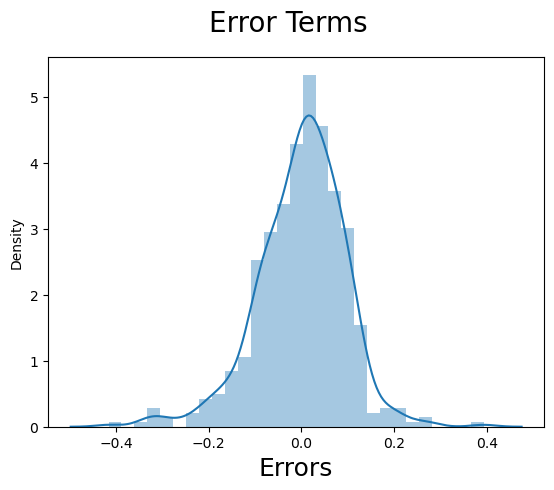

In [72]:
fig = plt.figure()
sns.distplot((res))
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

## Observation
From above graph we can conclude that the residuals is normally distributed so the assumption of `Linear Regression` is valid

## MAKING PREDICTION USING FINAL MODEL

In [73]:
scale_cols = con_col + ["cnt"]
bike_test_df[scale_cols] = minMaxScale.transform(bike_test_df[scale_cols])
bike_test_df.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light Snow,weathersit_Mist
count,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000,220.000
mean,0.036,0.700,0.559,0.533,0.638,0.313,0.522,0.255,0.264,0.236,0.482,0.100,0.055,0.091,0.086,0.095,0.105,0.059,0.086,0.086,0.073,0.086,0.127,0.168,0.100,0.164,0.177,0.118,0.027,0.318
std,0.188,0.459,0.233,0.217,0.149,0.160,0.219,0.437,0.442,0.426,0.501,0.301,0.228,0.288,0.282,0.295,0.307,0.236,0.282,0.282,0.260,0.282,0.334,0.375,0.301,0.371,0.383,0.324,0.163,0.467
min,0.000,0.000,0.047,0.026,0.262,-0.043,0.048,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.355,0.345,0.529,0.199,0.379,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,1.000,0.558,0.545,0.626,0.300,0.525,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,1.000,0.756,0.713,0.744,0.403,0.678,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
max,1.000,1.000,0.984,0.981,1.002,0.807,0.963,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [74]:
y_bike_test_df = bike_test_df.pop("cnt")
X_bike_test_df = bike_test_df

### Selecting only the variables that were part of final model

In [75]:
final_col = ["holiday", "temp", "windspeed", "season_spring", 
             "yr_2019", "mnth_9", "weathersit_Light Snow", "weathersit_Mist"]

X_test = X_bike_test_df[final_col]


# Adding constant variable to the test dataframe
X_test_lm6 = st_api.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  220 non-null    float64
 1   holiday                220 non-null    int64  
 2   temp                   220 non-null    float64
 3   windspeed              220 non-null    float64
 4   season_spring          220 non-null    uint8  
 5   yr_2019                220 non-null    uint8  
 6   mnth_9                 220 non-null    uint8  
 7   weathersit_Light Snow  220 non-null    uint8  
 8   weathersit_Mist        220 non-null    uint8  
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.7 KB


In [76]:
y_pred = lr8.predict(X_test_lm6)

## Evaluating the model

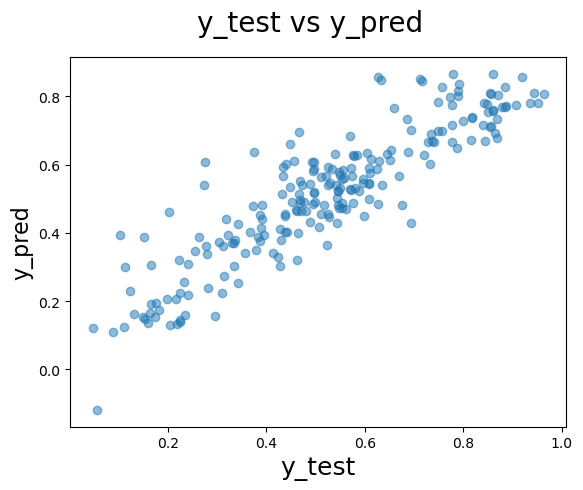

In [82]:
fig = plt.figure()
plt.scatter(y_bike_test_df, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

## R^2 value for Test set

In [78]:
r2_score(y_true=y_bike_test_df, y_pred=y_pred)

0.7998224143837718

## Adjusted R^2 value for the Test set

In [88]:
# From above, we know the value of r2
r2 = 0.7998224143837718

# n is number of rows in X
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7922327428912134

## Final observation

- Train R^2 is `0.822` and adj R^2 is `0.819`
- Test R^2 is `0.800` and adj R^2 is `0.792`
- This seems to be a really confident model.

## Final Verdict

As per our final model, the top 3 predictor variables are
- <b>Temperature (temp):</b> Coefficient value of `0.346` indicates that a unit increase in temprature will increase bike hire units by 0.346
- <b>Year(yr):</b> Coeffecient of `0.237` indicates that increase in year will increase the bike hire units by 0.237
- <b>weathersit_Light Snow:</b> negative Coeffecient of `0.280` indicates that a unit increaese in `weather_situation Light Snow` will decrease the bike hire by 0.28 units

<b>To achieve the maximum bookings, these variables will play the most significant role</b>

The next feature that contributes after the top three are
- <b>season_spring:</b> It has a negative coeffcient of 0.151 which indicates that increase in season_spring unit will decrease the bike hire by 0.151
- <b>windspeed:</b> It has a negative corellation with the bike hire. Which means that a unit increase in windspeed will decrease the bike hire by 0.141